# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  :   RNN
## Topic     :   Solve the cliff walking environment using SARSA.

### **Environment**

Cliff walking is a two dimensional board game.

![Demo 7 Q-learning](https://drive.google.com/uc?id=1rLg6GH1ErppUumPO06NTEMROQjwlMHxw)

* The environment has episodic tasks.

* Agent starts at the state **S** and traverses through the environment to reach goal **G**.

* Agent can move up, down, right, and left.

* Agent receives a reward of -1 for every movement except for the cliff and goal.

* Agent falling into the cliff attracts a reward of -100 and is sent back to the state **S**.

### **Import tools and environment**

In [ ]:
import gym
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys
import cliff_walking
from collections import namedtuple
from matplotlib import pyplot as plt
from collections import defaultdict
from cliff_walking import CliffWalkingEnv
matplotlib.style.use('ggplot')

In [ ]:
env = CliffWalkingEnv()

### **Create the $\epsilon-greedy$ policy** 

In [ ]:
#Creating an epsilon-greedy policy based on a particular Q-function and epsilon.
#Arguments:
#Q= A dictionary that maps from state-action-values
#epsilon= Probability of selecting a random action 
#nA= Number of actions in the environment
#Returns:
#A = Function that returns the probabilities for each action in the form of a numpy array of length nA

def make_epsilon_greedy_policy(Q, epsilon, nA):
    
  
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

### **SARSA**

In [ ]:
#SARSA algorithm= It is an on-policy TD control method that finds optimal epsilon-greedy policy
#Arguments:
#env= Cliff walking environment.
#num_episodes= Number of episodes to run
#discount_factor= Gamma
#alpha= Learning rate
#epsilon= Probability of sampling a random action
#Returns:
#A = Tuple of Q and stats
#Q = An optimal action-value function
#stats = An EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards

def sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
   
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    

    # Keeps track of useful statistics
    EpisodeStats = namedtuple("Stats",["episode_lengths", "episode_rewards"]) #storing stats in tuples helps during plotting the stats
    # Keeps track of useful statistics
    stats = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        # Print out which episode we're on, useful for debugging.
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        
        # Reset the environment and pick the first action
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        # One step in the environment
        for t in itertools.count():
            # Take a step
            next_state, reward, done, _ = env.step(action)
            
            # Pick the next action
            next_action_probs = policy(next_state)
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)
            
            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # TD Update
            td_target = reward + discount_factor * Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
    
            if done:
                break
                
            action = next_action
            state = next_state        
    
    return Q, stats

In [ ]:
Q, stats = sarsa(env, 200)

Episode 200/200.

### **Plot the stats**

In [ ]:
def plot_episode_stats(stats, smoothing_window=10, noshow=False):
    # Plot the episode length over time
    fig1 = plt.figure(figsize=(10,5))
    plt.plot(stats.episode_lengths)
    plt.xlabel("Episode")
    plt.ylabel("Episode Length")
    plt.title("Episode Length over Time")
    if noshow:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Plot the episode reward over time
    fig2 = plt.figure(figsize=(10,5))
    rewards_smoothed = pd.Series(stats.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
    if noshow:
        plt.close(fig2)
    else:
        plt.show(fig2)

    # Plot time steps and episode number
    fig3 = plt.figure(figsize=(10,5))
    plt.plot(np.cumsum(stats.episode_lengths), np.arange(len(stats.episode_lengths)))
    plt.xlabel("Time Steps")
    plt.ylabel("Episode")
    plt.title("Episode per time step")
    if noshow:
        plt.close(fig3)
    else:
        plt.show(fig3)

    return fig1, fig2, fig3

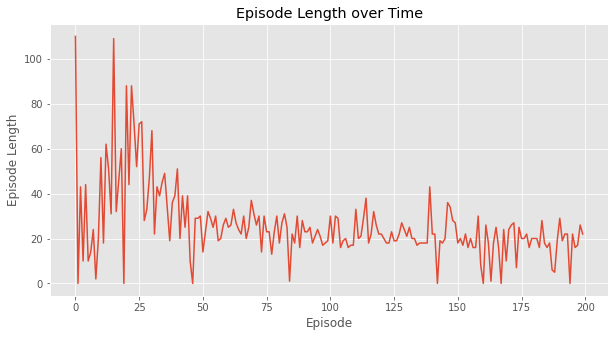

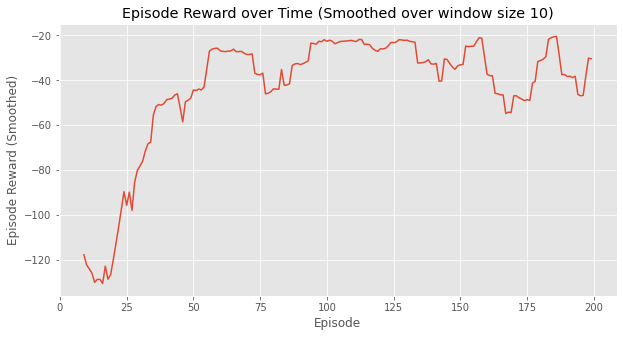

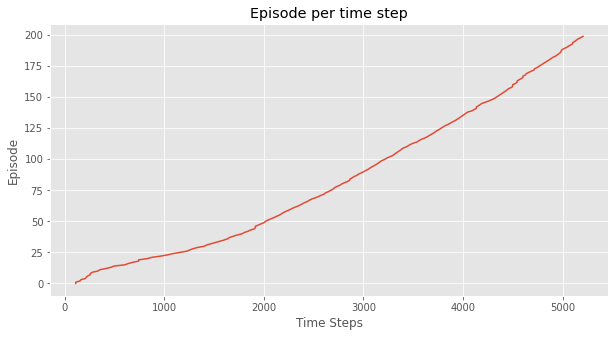

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plot_episode_stats(stats)